In [363]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [364]:
df=pd.read_csv('data.csv')

In [365]:
df.head(5)


,Age,City,Total Sales
0,0,NaN,10053.33
1,41,SASKATOON,8654.14
2,0,NaN,3284.41
3,0,NaN,3699.95
4,0,SASKATOON,44536105.29


In [366]:
df = df.dropna(subset=['City'])

In [367]:
df = df[(df['Age'] >= 18) & (df['Age'] <= 100)]
max_age = df['Age'].max()
min_age = df['Age'].min()
print(f"Maximum age: {max_age}")
print(f"Minimum age: {min_age}")

Maximum age: 100
Minimum age: 18


{'whiskers': [<matplotlib.lines.Line2D at 0x23fd6483750>,
 'caps': [<matplotlib.lines.Line2D at 0x23fd6483c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x23fd6482c10>],
 'medians': [<matplotlib.lines.Line2D at 0x23fd6480410>],
 'fliers': [<matplotlib.lines.Line2D at 0x23fd64839d0>],
 'means': []}

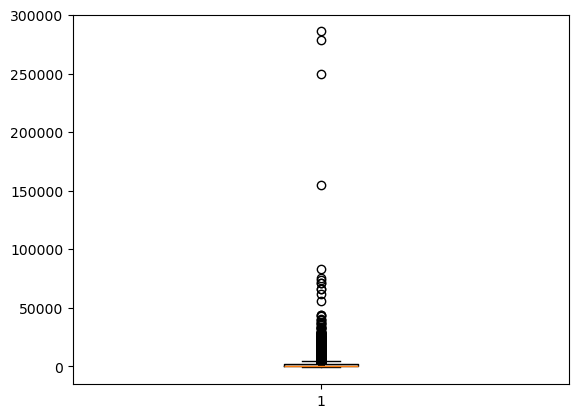

In [368]:
plt.boxplot(df['Total Sales'])


In [369]:
df = df[(df['Total Sales'] >= 100) & (df['Total Sales'] <= 25000)]
max_sales = df['Total Sales'].max()
min_sales = df['Total Sales'].min()
print(f"Maximum Sales: {max_sales}")
print(f"Minimum Sales: {min_sales}")

Maximum Sales: 24986.71
Minimum Sales: 100.0


In [370]:
label_encoder = LabelEncoder()
df['City_encoded'] = label_encoder.fit_transform(df['City'])
df.drop('City', axis=1, inplace=True)

In [371]:
print(df)

        Age  Total Sales  City_encoded
1        41      8654.14           642
8        86     10974.11           642
10       89      2628.89           642
14       97       368.29           642
16       70      1637.56           642
...     ...          ...           ...
182928   79      6073.75           642
182929   65       294.30           642
182930   54       294.47           296
182931   36       375.83           642
182933   65      3908.21           826

[68875 rows x 3 columns]


In [372]:
X=df.values

In [373]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

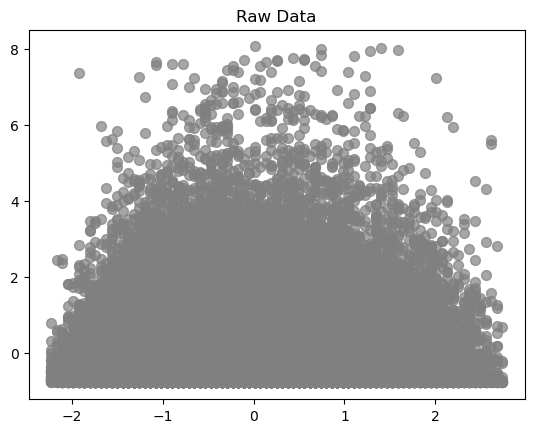

In [374]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=50, c='gray', alpha=0.7)
plt.title('Raw Data')
plt.show()

Text(0.5, 1.0, 'Elbow Method For Optimal k')

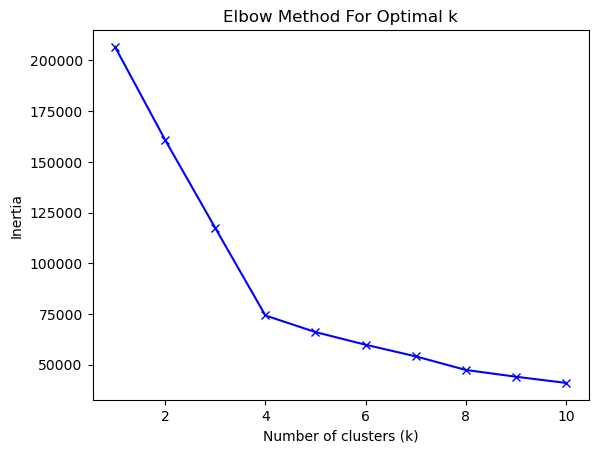

In [375]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')

In [376]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [377]:
y_kmeans = kmeans.predict(X_scaled)

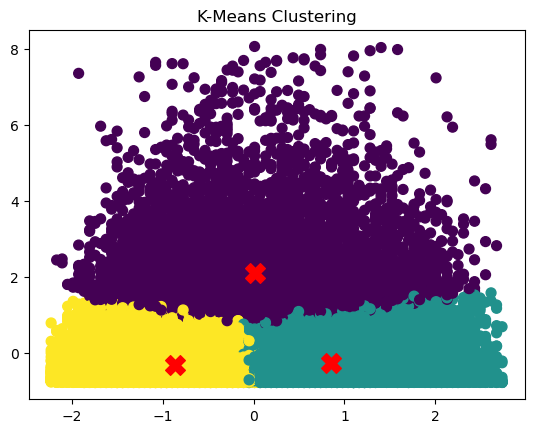

In [378]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')  
plt.title('K-Means Clustering')
plt.show()

In [379]:
print("Cluster Centroids:\n", kmeans.cluster_centers_)

Cluster Centroids:
 [[ 0.01827921  2.10777212  0.13644973]
 [ 0.85569913 -0.27913128 -0.05569184]
 [-0.86660793 -0.33188036  0.01638305]]
